In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)


In [10]:
# Function to read edges from a file
def read_edges_from_file(filename):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            edges.append((int(nodes[0]), int(nodes[1])))
    return edges

# Function to read features from a file
def read_features_from_file(filename):
    features = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            node = int(parts[0])  # First number is the node ID
            feature_vector = np.array(list(map(int, parts[1:])))  # Rest are features
            features[node] = feature_vector
    return features

# Gaussian kernel similarity
def gaussian_similarity(x, y, sigma=1.0):
    diff = x - y
    distance = np.dot(diff, diff)  # Squared Euclidean distance
    return np.exp(-distance / (2 * sigma ** 2))

# Create adjacency matrix with Gaussian kernel weights
def create_weighted_adjacency_matrix(edges, features, size, sigma=1.0):
    A = np.zeros((size + 1, size + 1), dtype=float)
    for u, v in edges:
        if u in features and v in features:
            weight = gaussian_similarity(features[u], features[v], sigma)
            A[u, v] = weight
            A[v, u] = weight  # For undirected graph
    return A

# Create degree matrix
def create_degree_matrix(adjacency_matrix):
    D = np.diag(np.sum(adjacency_matrix, axis=1))
    return D

# Create Laplacian matrix
def create_laplacian_matrix(A, D):
    return D - A

# Compute eigenvalues and eigenvectors
def analyze_laplacian(L):
    eigenvalues, eigenvectors = np.linalg.eig(L)
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

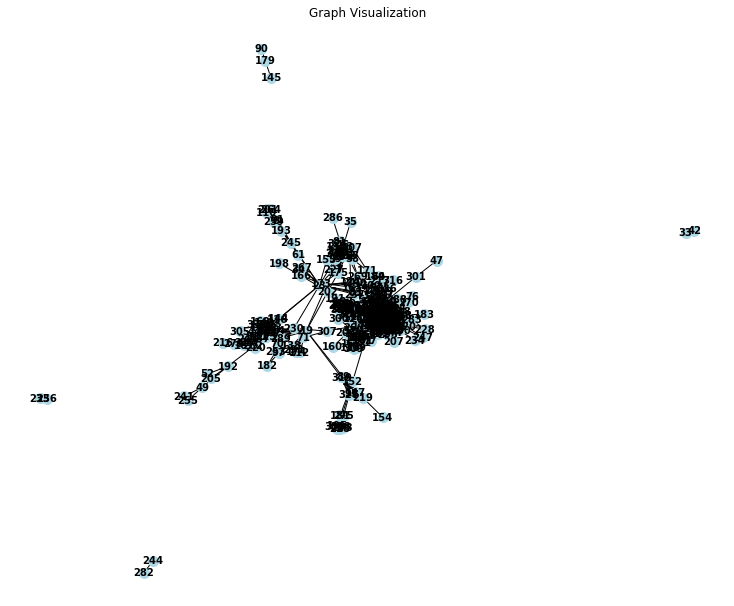

Number of eigenvalues: 348
Number of eigenvectors: 348


In [11]:
# Main process
edges = read_edges_from_file('C:\\Users\\hasee\\OneDrive\\5th Semester\\ML\\Assignments\\Practical Application in Identifying Social Networks Through a Graph-Based Dataset\\dataset\\0.edges')
features = read_features_from_file('C:\\Users\\hasee\\OneDrive\\5th Semester\\ML\\Assignments\\Practical Application in Identifying Social Networks Through a Graph-Based Dataset\\dataset\\0.feat')

# Determine the maximum node ID
max_node = max(max(edge) for edge in edges)

# Create weighted adjacency matrix
A = create_weighted_adjacency_matrix(edges, features, max_node, sigma=1.0)
D = create_degree_matrix(A)
L = create_laplacian_matrix(A, D)
eigenvalues, eigenvectors = analyze_laplacian(L)

# Visualization
G = nx.Graph()
G.add_edges_from(edges)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

# Print eigenvalues and eigenvector dimensions
print("Number of eigenvalues:", len(eigenvalues))
print("Number of eigenvectors:", len(eigenvectors))

In [15]:
print(len(A[0]))

348


c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


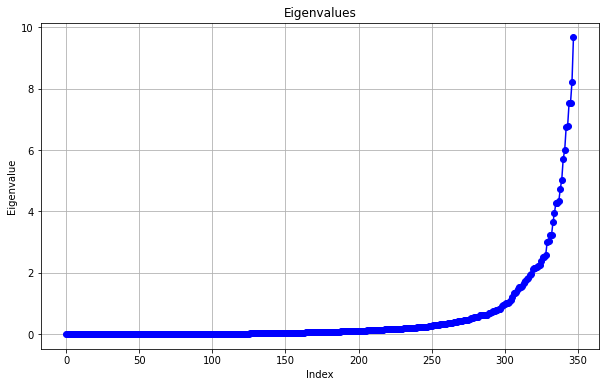

c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


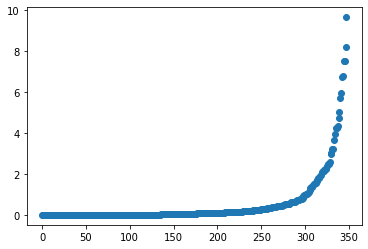

In [15]:
import numpy as np  
import matplotlib.pyplot as plt  

# Basic plot  
plt.figure(figsize=(10, 6))  
plt.plot(eigenvalues, 'bo-')  # Blue dots connected by lines  
plt.title('Eigenvalues')  
plt.xlabel('Index')  
plt.ylabel('Eigenvalue')  
plt.grid(True)  
plt.show()  

# Alternatively, scatter plot  
plt.scatter(range(len(eigenvalues)), eigenvalues)  
plt.show()  

Largest Eigen Gap: (1.440015354440817+0j)
Index of Largest Gap: 346


c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\matplotlib\text.py:1348: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\matplotlib\text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
c:\Users\hasee\miniconda3\envs\AI3\lib\site-packages\matplotlib\text.py:687: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


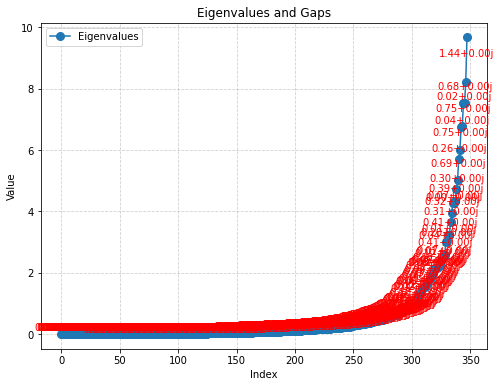

In [16]:
# Step 1: Sort the eigenvalues in ascending order
sorted_eigenvalues = np.sort(eigenvalues)

# Step 2: Compute the gaps between consecutive eigenvalues
eigen_gaps = np.diff(sorted_eigenvalues)

# Step 3: Find the largest eigen gap and its position
largest_gap = np.max(eigen_gaps)
gap_index = np.argmax(eigen_gaps)

#print("Sorted Eigenvalues:", sorted_eigenvalues)
#print("Eigen Gaps:", eigen_gaps)
print("Largest Eigen Gap:", largest_gap)
print("Index of Largest Gap:", gap_index)

# Plot the eigenvalues and the gaps
plt.figure(figsize=(8, 6))

# Plot eigenvalues as points
plt.plot(sorted_eigenvalues, 'o-', label="Eigenvalues", markersize=8)

# Annotate gaps
for i in range(len(eigen_gaps)):
    x_pos = i + 0.5  # Position between two eigenvalues
    y_pos = (sorted_eigenvalues[i] + sorted_eigenvalues[i + 1]) / 2  # Midpoint for the text
    plt.annotate(f"{eigen_gaps[i]:.2f}", xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 0.1), ha="center", color="red")

# Enhance plot
plt.title("Eigenvalues and Gaps")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

